In [54]:
# Importing necessary libraries
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk import ngrams
from collections import Counter
import re
from nltk.corpus import stopwords

In [55]:
# Downloading necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Axler\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Axler\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
# Load the dataset
df = pd.read_csv('C:/Users/Axler/OneDrive - Universiti Sains Malaysia/Y3/CPC353/Lab/Dataset/email_classification.csv')

In [57]:
def preprocess_text(text):
    # Ensure the text is a string (in case it's NaN or another type)
    if not isinstance(text, str):
        text = str(text)
    text = text.lower()  # Convert text to lowercase
    # Remove "ham" and "spam" explicitly
    text = re.sub(r'\bham\b', '', text)
    text = re.sub(r'\bspam\b', '', text)
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    # Tokenize the text
    tokens = text.split()
    # Remove "ham" and "spam" explicitly from the tokens list
    tokens = [token for token in tokens if token not in ['ham', 'spam']]
    # Remove stop words, excluding "me"
    stop_words = set(stopwords.words('english'))
    stop_words.discard("click")
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Join the filtered tokens back into text
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [58]:
# Drop the 'label' column (if you no longer need it)
df = df.drop(columns=['label'])
# Step 2: Check the structure of the CSV to identify the text column (replace 'text_column' with your actual column name)
# If you have a column called 'text' that contains the text to preprocess, do this:
text_column = 'email'  # Replace with the actual column name if it's different

# Step 3: Preprocess the text column
df[text_column] = df[text_column].apply(preprocess_text)

# Step 4: Write the processed data to a new CSV file
df.to_csv('preprocessed_text.csv', index = False)

In [59]:
# Function to create n-grams
def create_ngrams(text, n):
    tokens = nltk.word_tokenize(text)
    return list(ngrams(tokens, n))

In [60]:
# Create bigrams and trigrams
bigrams = []
trigrams = []

In [61]:
# loop through each email in the cleaned_email column
for email in df['email']:
    tokens = email.lower().split()  # Convert to lowercase
    bigrams.extend(ngrams(tokens, 2))
    trigrams.extend(ngrams(tokens, 3))

# Count the frequency of bigrams and trigrams
bigrams_freq = Counter(bigrams)
trigrams_freq = Counter(trigrams)

# Get the most common bigrams and trigrams
most_common_bigrams = bigrams_freq.most_common(10)
most_common_trigrams = trigrams_freq.most_common(10)

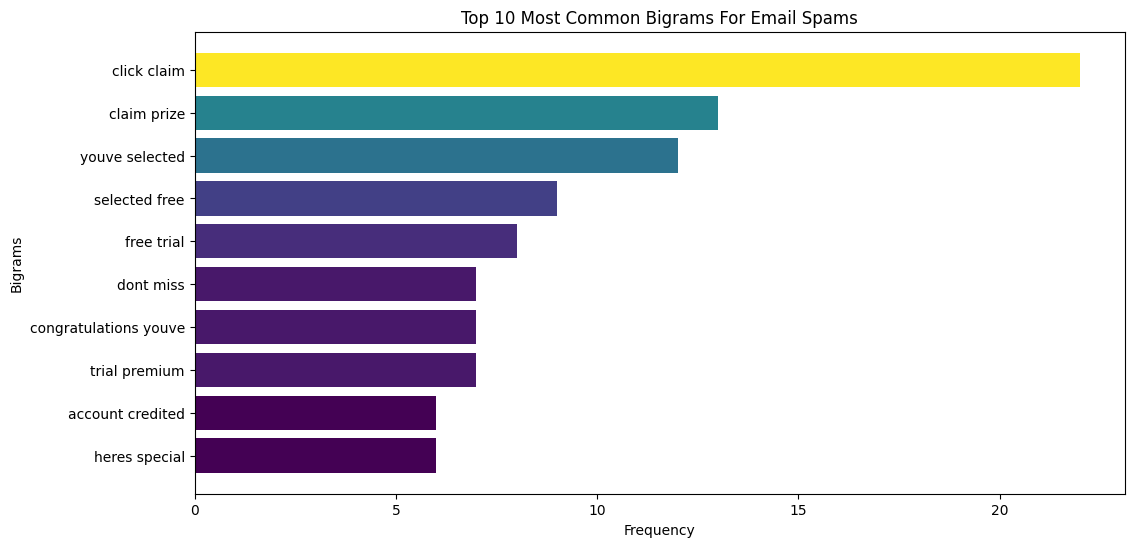

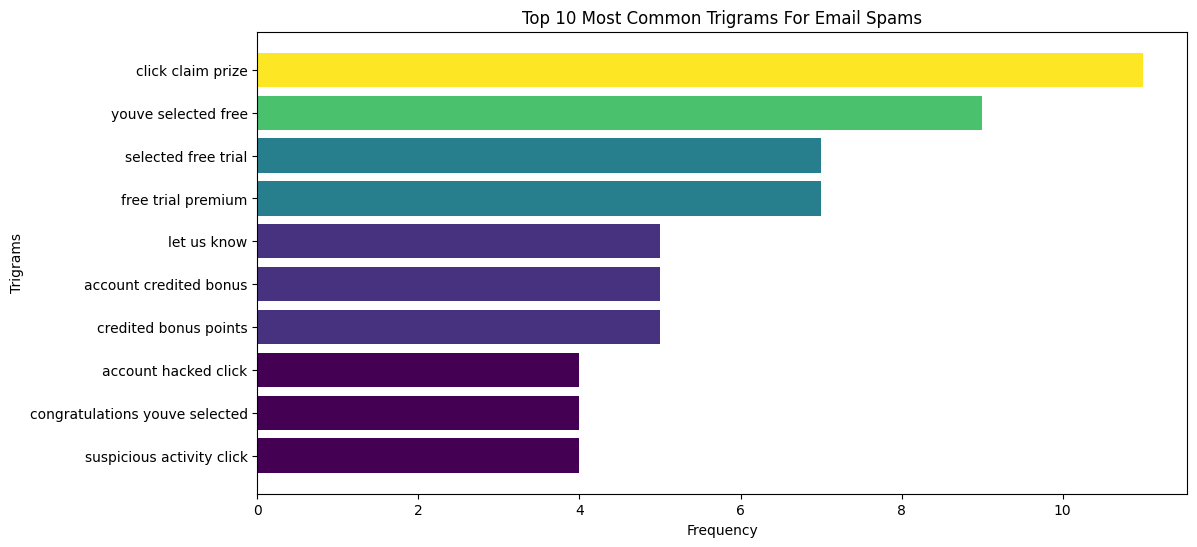

In [62]:
# Get frequencies for the most common bigrams
frequencies_bigrams = [freq for _, freq in most_common_bigrams]
# Get frequencies for the most common trigrams
frequencies_trigrams = [freq for _, freq in most_common_trigrams]

# Create a colormap
cmap = plt.get_cmap('viridis')  # A popular colormap for visualizations

# Normalize frequencies to the range [0, 1] for color mapping
norm_bigrams = plt.Normalize(min(frequencies_bigrams), max(frequencies_bigrams))
norm_trigrams = plt.Normalize(min(frequencies_trigrams), max(frequencies_trigrams))

# Create a color array based on the normalized frequencies
colors_bigrams = [cmap(norm_bigrams(freq)) for freq in frequencies_bigrams]
colors_trigrams = [cmap(norm_trigrams(freq)) for freq in frequencies_trigrams]

# Sort bigrams and trigrams by frequency in descending order
sorted_bigrams = sorted(most_common_bigrams, key = lambda x: x[1], reverse = True)
sorted_trigrams = sorted(most_common_trigrams, key = lambda x: x[1], reverse = True)

# Get sorted frequencies and n-grams
sorted_frequencies_bigrams = [freq for _, freq in sorted_bigrams]
sorted_frequencies_trigrams = [freq for _, freq in sorted_trigrams]
sorted_bigrams = [' '.join(bigrams) for bigrams, _ in sorted_bigrams]
sorted_trigrams = [' '.join(trigrams) for trigrams, _ in sorted_trigrams]

# Visualization of bigrams
plt.figure(figsize = (12, 6))
plt.barh(sorted_bigrams, sorted_frequencies_bigrams, color = colors_bigrams)
plt.title('Top 10 Most Common Bigrams For Email Spams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
plt.show()

# Visualization of trigrams
plt.figure(figsize = (12, 6))
plt.barh(sorted_trigrams, sorted_frequencies_trigrams, color = colors_trigrams)
plt.title('Top 10 Most Common Trigrams For Email Spams')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
plt.show()

In [63]:
# Create a dataframe for the bigrams and trigrams
bigrams_df = pd.DataFrame(most_common_bigrams, columns = ['bigrams', 'frequency'])
trigrams_df = pd.DataFrame(most_common_trigrams, columns = ['trigrams', 'frequency'])

# Print the bigrams and trigrams dataframes
print(bigrams_df)
print(trigrams_df)

                    bigrams  frequency
0            (click, claim)         22
1            (claim, prize)         13
2         (youve, selected)         12
3          (selected, free)          9
4             (free, trial)          8
5              (dont, miss)          7
6  (congratulations, youve)          7
7          (trial, premium)          7
8       (account, credited)          6
9          (heres, special)          6
                             trigrams  frequency
0               (click, claim, prize)         11
1             (youve, selected, free)          9
2             (selected, free, trial)          7
3              (free, trial, premium)          7
4                     (let, us, know)          5
5          (account, credited, bonus)          5
6           (credited, bonus, points)          5
7            (account, hacked, click)          4
8  (congratulations, youve, selected)          4
9       (suspicious, activity, click)          4
